In [14]:
## Facundo Espina Coding Challenge Smart Pricer

## Data Exploration
a) What do you see (patterns/potential issues)?

**Observations**  

- Sales peak in February and drop off afterward.
- Weekends have higher sales than weekdays

- A sharp drop in ticket sales for the 2020-2021 season, likely due to pandemic-related ski resort closures.
- This may distort model predictions if not handled properly.
  
- The "valid_tickets" column was initially stored as a string and had to be converted to integers.
- The "Ski Day" column needed conversion to a proper datetime format.

- Some dates show unusually high or low ticket sales could be due to extreme weather, special events, or promotions.

- The dataset does not include weather conditions, holidays, or pricing data, which could improve predictions.

In [1]:
import sqlite3
import pandas as pd

db_path = "tickets.db"

conn = sqlite3.connect(db_path)
df = pd.read_sql_query("SELECT * FROM timeseries", conn)
conn.close()


df

,Ski Day,valid_tickets
0,2016-12-07,112
1,2016-12-08,1769
2,2016-12-09,4230
3,2016-12-10,5952
4,2016-12-11,5451
...,...,...
678,2022-02-01,4
679,2022-02-02,4
680,2022-02-03,4
681,2022-02-04,4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Ski Day        683 non-null    object
 1   valid_tickets  683 non-null    object
dtypes: object(2)
memory usage: 10.8+ KB


In [3]:
import matplotlib.pyplot as plt


# Ski Day to datetime and make sure it is sorted
df["Ski Day"] = pd.to_datetime(df["Ski Day"])
df.sort_values("Ski Day", inplace=True)

# valid_tickets to integer
df["valid_tickets"] = pd.to_numeric(df["valid_tickets"], errors="coerce")  # Convert and handle errors

# Check for missing values
missing_values = df.isnull().sum()
print('missing values:')
missing_values

missing values:


Ski Day          0
valid_tickets    0
dtype: int64

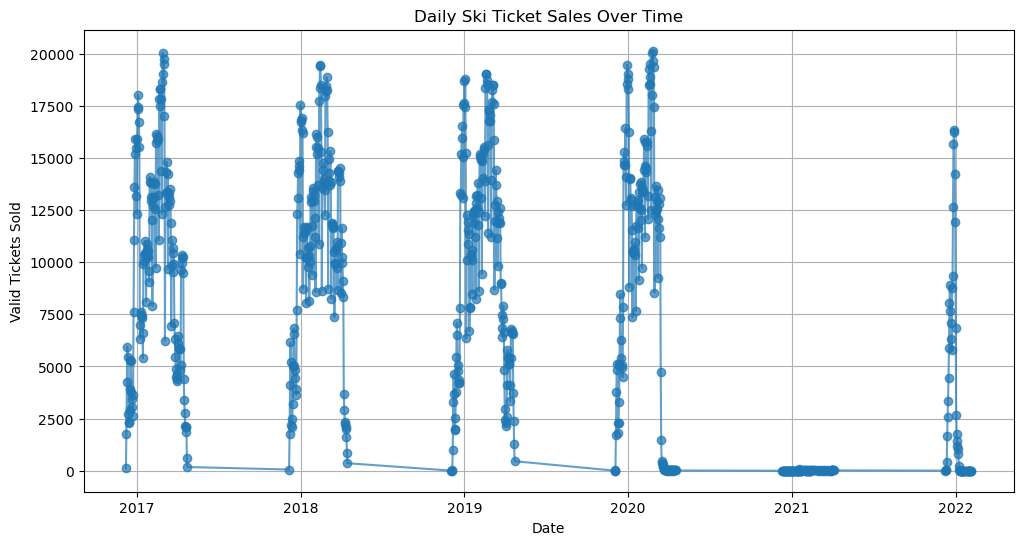

In [4]:


# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(df["Ski Day"], df["valid_tickets"], marker="o", linestyle="-", alpha=0.7)
plt.title("Daily Ski Ticket Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Valid Tickets Sold")
plt.grid(True)
plt.show()


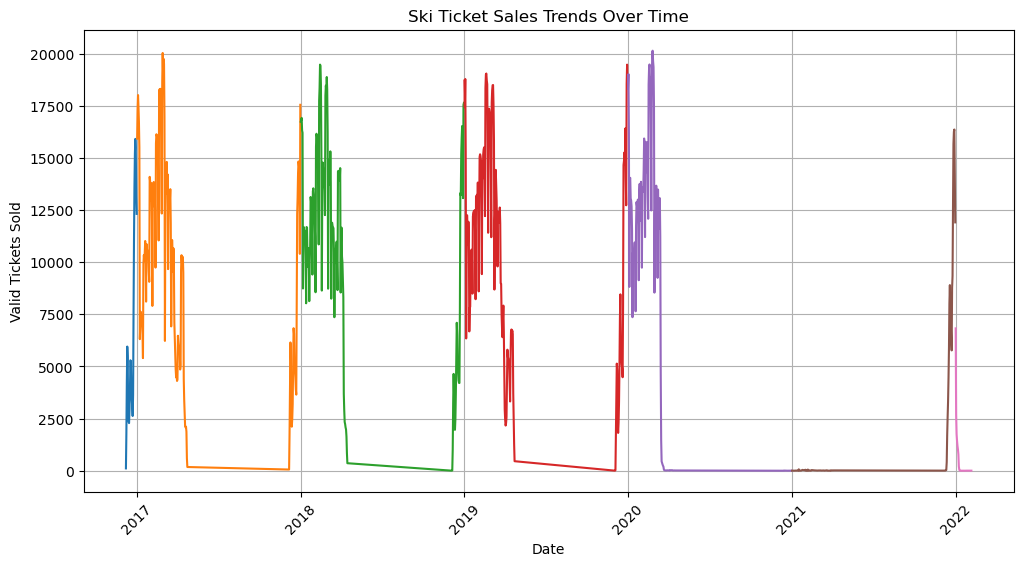

/var/folders/sf/zgjjkvc11w39w0kyv5t2xfz80000gn/T/ipykernel_5347/4261856843.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Month", y="valid_tickets", palette="coolwarm")


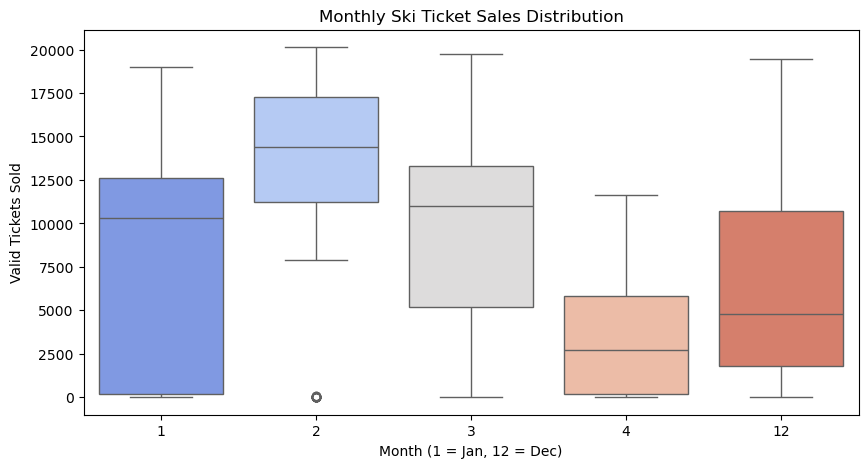

/var/folders/sf/zgjjkvc11w39w0kyv5t2xfz80000gn/T/ipykernel_5347/4261856843.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Day of Week", y="valid_tickets", palette="viridis")


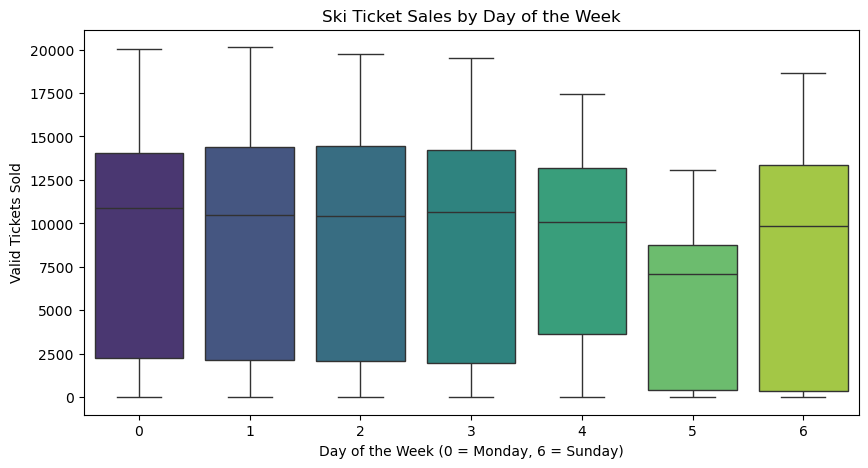

In [5]:
import seaborn as sns

# useful time features
df["Year"] = df["Ski Day"].dt.year
df["Month"] = df["Ski Day"].dt.month
df["Day of Week"] = df["Ski Day"].dt.dayofweek  # Monday=0, Sunday=6

# yearly Trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Ski Day", y="valid_tickets", hue="Year", palette="tab10", legend=False)
plt.title("Ski Ticket Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Valid Tickets Sold")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# monthly trends
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Month", y="valid_tickets", palette="coolwarm")
plt.title("Monthly Ski Ticket Sales Distribution")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Valid Tickets Sold")
plt.show()

# weekly trends (Weekends vs. Weekdays)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Day of Week", y="valid_tickets", palette="viridis")
plt.title("Ski Ticket Sales by Day of the Week")
plt.xlabel("Day of the Week (0 = Monday, 6 = Sunday)")
plt.ylabel("Valid Tickets Sold")
plt.show()


## Model Selection
b) Which forecasting model did you choose and why?

**I decided to use Prophet**

- Prophet is built for time-series with strong seasonality
- Ski ticket sales have a clear seasonal pattern (peak sales in certain dates, drop in off-season).  
- Prophet automatically detects and models seasonality without requiring manual adjustments.

- Prophet handles missing or irregular data well
- The 2020-2021 ski season was likely closed due to COVID-19, creating a gap in sales data.  
- Prophet is robust to missing or irregular data and can still produce reliable forecasts. (will probably still test it removing the data of the covid season and compare results)

- Prophet is easy to use & interpreta
- It provides trend, seasonality, and holiday effects separately, making it easy to understand how different factors impact sales.  
- Offers uncertainty intervals, which help assess confidence in predictions.


**Why I Chose Prophet Over Other Models**

**ARIMA**: Assumes linear trends and requires manual tuning of seasonality parameters. Prophet automatically detects seasonality and trends.

**XGBoost / LightGBM**: Requires external features (like weather, holidays, price, etc) to perform well. We only have ticket sales data, and Prophet works well with just time-series.

## MVP
c) Are there steps you were unable to finish?

d) Suggest 3 additional steps/features to add.

e) How did you use AI to help you in the process?

c) 

- I attempted to compare the results between including and excluding the COVID-19 season.
- However, due to limited time, I focused only on the model including the COVID season.
- Further hyperparameter tuning and validation techniques, such as backtesting, could improve the models accuracy but were not implemented within the time limit.
- The model relies only on historical sales data without external influencing factors, which may limit its predictive power.


d)

- Incorporate external factors: Adding weather data (temperature, snowfall levels), economic indicators, and local events could improve forecast accuracy.
- Holiday and special event adjustments: Identifying major holidays, school breaks, and special promotions could refine seasonality patterns.
- Advanced validation techniques: Using cross-validation, backtesting, or comparing Prophet with other models like XGBoost or LSTM to assess performance.


e) 
- To rephrase a few things.
- To fix simple syntaxis errors
- I had the issue of getting negative forecasts (Of course it is impossible to have negative sales hahaha) and had to check with chatgpt what was the hyperparameter to avoid that from happening in Prophet

In [6]:
df

,Ski Day,valid_tickets,Year,Month,Day of Week
0,2016-12-07,112,2016,12,2
1,2016-12-08,1769,2016,12,3
2,2016-12-09,4230,2016,12,4
3,2016-12-10,5952,2016,12,5
4,2016-12-11,5451,2016,12,6
...,...,...,...,...,...
678,2022-02-01,4,2022,2,1
679,2022-02-02,4,2022,2,2
680,2022-02-03,4,2022,2,3
681,2022-02-04,4,2022,2,4


20:40:34 - cmdstanpy - INFO - Chain [1] start processing
20:40:35 - cmdstanpy - INFO - Chain [1] done processing


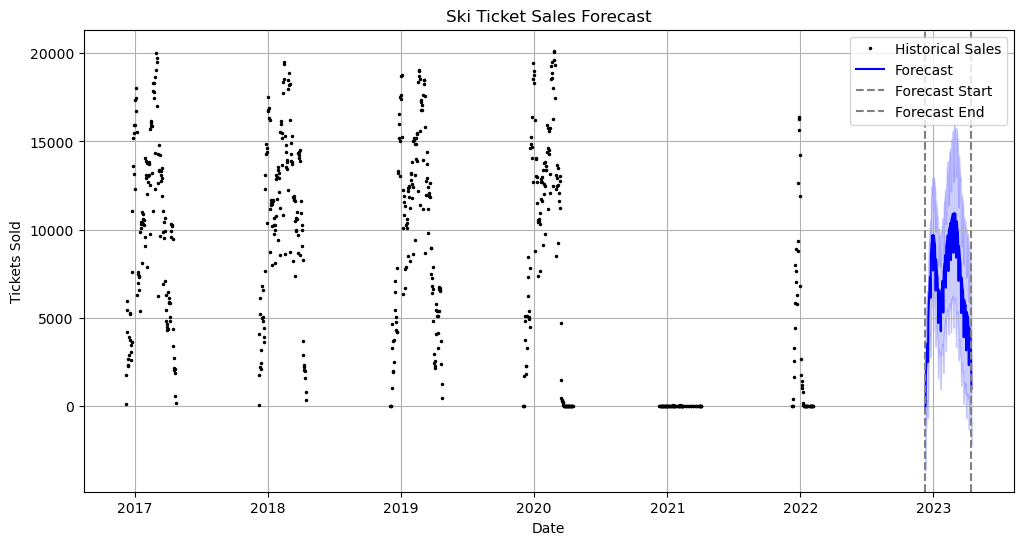

        Date  Forecasted Tickets
0 2022-12-10            1.000000
1 2022-12-11         1873.650251
2 2022-12-12         2238.826408
3 2022-12-13         2583.679204
4 2022-12-14         2953.360613


In [9]:
from prophet import Prophet

# rrename columns for compatibility
df.rename(columns={"Ski Day": "ds", "valid_tickets": "y"}, inplace=True)

# prevent negative forecasts
df["y"] = df["y"].clip(lower=1)  

# initialize Prophet model
prophet_model = Prophet(
    yearly_seasonality=True,  
    weekly_seasonality=True,  
    daily_seasonality=False,  
    changepoint_prior_scale=0.3,  
    seasonality_mode="multiplicative"  
)

# s et lower bound for forecasts
df["floor"] = 1  

# fit the model using all available data
prophet_model.fit(df)


# ggenerate future dates for forecasting
future_dates = pd.date_range(start="2022-12-10", end="2023-04-15", freq="D")
future = pd.DataFrame({"ds": future_dates})
future["floor"] = 1  

# make predictions
forecast = prophet_model.predict(future)

# ensure no negative predictions
forecast["yhat"] = forecast["yhat"].clip(lower=1)

# plot forecasted results
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], df["y"], "k.", markersize=3, label="Historical Sales")
plt.plot(forecast["ds"], forecast["yhat"], "b-", label="Forecast")
plt.fill_between(forecast["ds"], forecast["yhat_lower"], forecast["yhat_upper"], color="blue", alpha=0.2)
plt.axvline(pd.Timestamp("2022-12-10"), color="gray", linestyle="--", label="Forecast Start")
plt.axvline(pd.Timestamp("2023-04-15"), color="gray", linestyle="--", label="Forecast End")
plt.legend()
plt.title("Ski Ticket Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Tickets Sold")
plt.grid(True)
plt.show()

# aave forecast results to csv (only dates and predicted valid tickets)
forecast[["ds", "yhat"]].rename(columns={"ds": "Date", "yhat": "Forecasted Tickets"}).to_csv("final_forecast_all_data.csv", index=False)


# display first few rows of the forecast
print(forecast[["ds", "yhat"]].rename(columns={"ds": "Date", "yhat": "Forecasted Tickets"}).head())


## Bonus
4) Visualize your results: Create graphs to support your findings.
6) Validate your predictions: Implement a validation method.
7) Dockerize your application: Make it easily deployable.

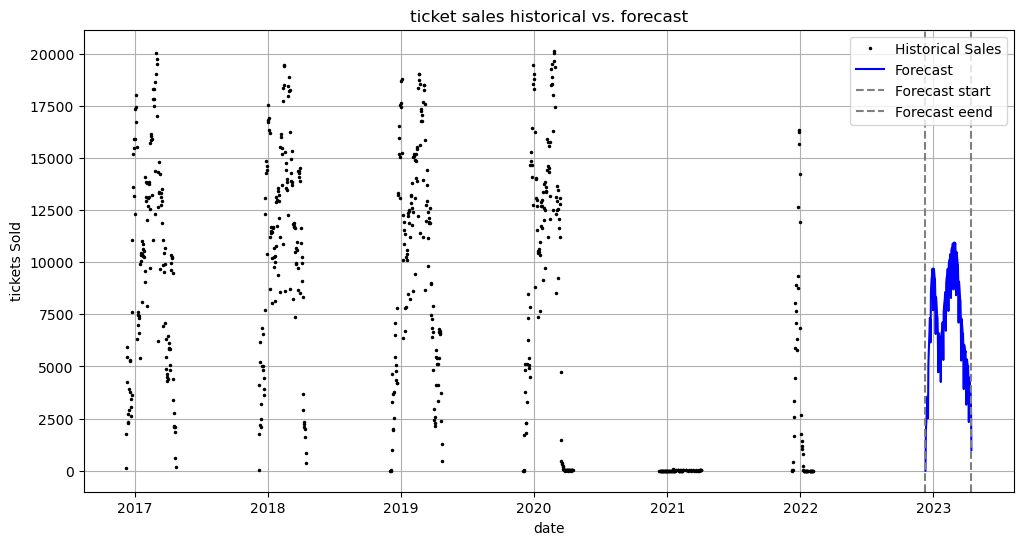

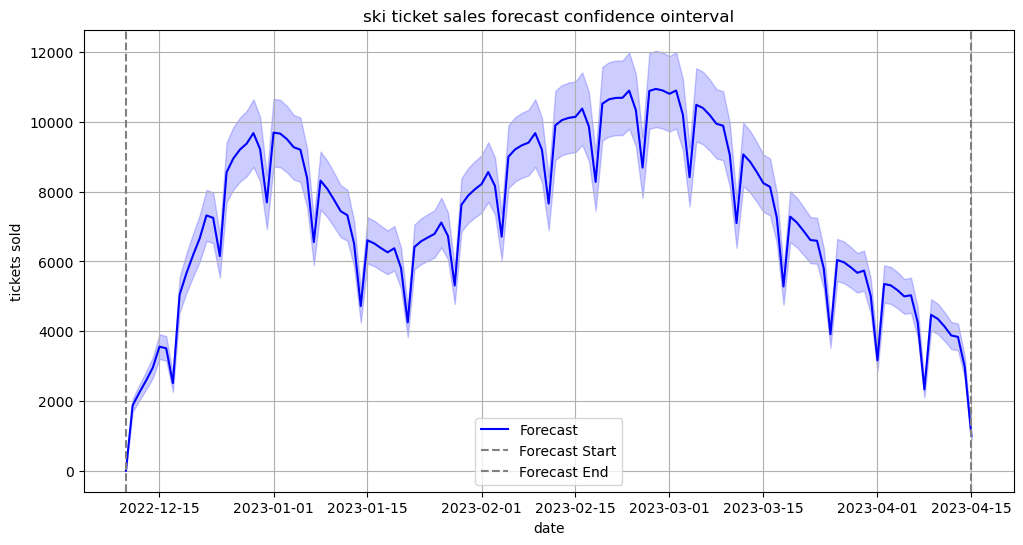

In [13]:
from prophet.plot import plot_components_plotly

# load clean forecast results
forecast = pd.read_csv("final_forecast_all_data.csv")
df = pd.read_csv("cleaned_tickets.csv")

# convert 'ds' column to datetime
forecast["Date"] = pd.to_datetime(forecast["Date"])
df["Ski Day"] = pd.to_datetime(df["Ski Day"])

# Rename columns
df.rename(columns={"Ski Day": "Date", "valid_tickets": "y"}, inplace=True)

# overall f orecast vs. historical data
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["y"], "k.", markersize=3, label="Historical Sales")
plt.plot(forecast["Date"], forecast["Forecasted Tickets"], "b-", label="Forecast")
plt.axvline(pd.Timestamp("2022-12-10"), color="gray", linestyle="--", label="Forecast start")
plt.axvline(pd.Timestamp("2023-04-15"), color="gray", linestyle="--", label="Forecast eend")
plt.legend()
plt.title("ticket sales historical vs. forecast")
plt.xlabel("date")
plt.ylabel("tickets Sold")
plt.grid(True)
plt.show()


# forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(forecast["Date"], forecast["Forecasted Tickets"], "b-", label="Forecast")
plt.fill_between(forecast["Date"], forecast["Forecasted Tickets"] * 0.9, forecast["Forecasted Tickets"] * 1.1, color="blue", alpha=0.2)
plt.axvline(pd.Timestamp("2022-12-10"), color="gray", linestyle="--", label="Forecast Start")
plt.axvline(pd.Timestamp("2023-04-15"), color="gray", linestyle="--", label="Forecast End")
plt.legend()
plt.title("ski ticket sales forecast confidence ointerval")
plt.xlabel("date")
plt.ylabel("tickets sold")
plt.grid(True)
plt.show()


Conclusions and Next Steps

- The model captures seasonality well – The forecast follows the same pattern as past ski seasons but in a crappy less detailed way, with peaks in January and February and a decline towards April. This shows that Prophet correctly identified the yearly trend.

- Sales forecasts seem reasonable – The predicted ticket sales align with previous seasons, reaching around 10,000–12,000 at peak times. The confidence interval looks reasonable, but there is some uncertainty.

- The model only uses historical ticket sales. Adding external factors like snowfall, weather conditions, and economic data could improve accuracy.

- While the model predicts general trends well, fine-tuning parameters or testing other models could improve performance.

- If time allowed, I would compare this model’s performance against a version trained with external data and try optimizing Prophet’s changepoint detection to adjust better to sudden increases in sales.
    